Quantitative Analysis of Price & Daily Returns

In [1]:
#Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
from scipy import stats
from scipy.stats import norm

In [2]:
#download data
amzn = yf.download('AMZN', start='2018-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [4]:
#Store instantaneous rate of return in separate series
amzn_return = round(np.log(amzn.Close).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
2018-01-03    1.27
2018-01-04    0.45
2018-01-05    1.60
2018-01-08    1.43
2018-01-09    0.47
Name: Close, dtype: float64

<Axes: xlabel='Date'>

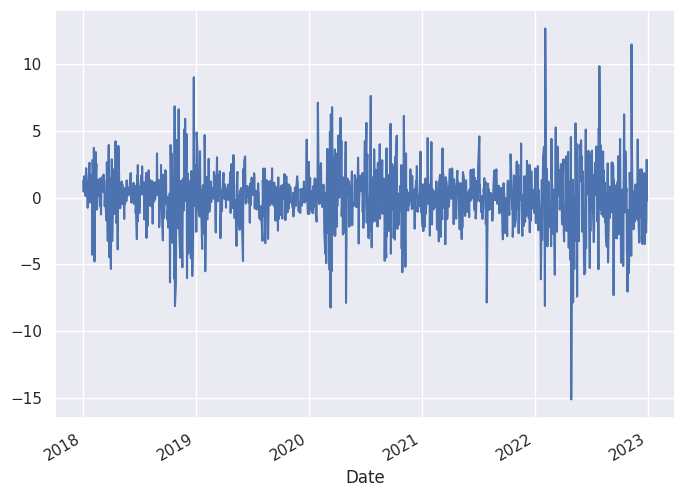

In [5]:
#plot the series
amzn_return.plot()


<Axes: xlabel='Date'>

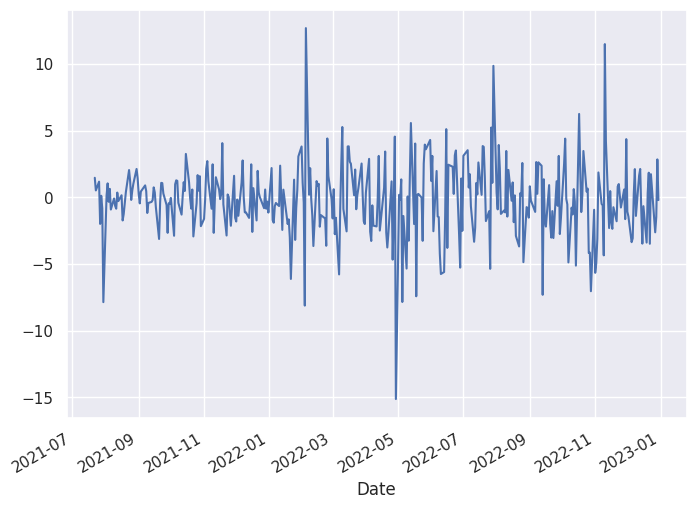

In [6]:
#plot only last year's data
amzn_return[-365:].plot()

In [7]:
#Descriptives data
amzn_return.describe()

count    1258.000000
mean        0.027520
std         2.256627
min       -15.140000
25%        -1.057500
50%         0.120000
75%         1.167500
max        12.690000
Name: Close, dtype: float64

In [8]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5
#Kurtosis = 4.142888320820776 (>3): Indicates leptokurtic distribution. Leptokurtic distributions have fatter tails and a more peaked central region compared to a normal distribution. This implies that the dataset has more outliers or extreme values than a normal distribution.

In [9]:
#for comparision generate random numbers that follow normal distribution
x = norm.rvs(mean, std, n)
stats.describe(x)


DescribeResult(nobs=1258, minmax=(-6.522865349653215, 7.503529563978621), mean=0.12709794961315024, variance=4.910340292734808, skewness=0.07144801133937712, kurtosis=-0.09116935277000593)

(array([  4.,  13.,  36.,  62., 133., 154., 202., 227., 161., 115.,  78.,
         48.,  17.,   5.,   3.]),
 array([-6.52286535, -5.58777236, -4.65267936, -3.71758637, -2.78249337,
        -1.84740038, -0.91230738,  0.02278561,  0.9578786 ,  1.8929716 ,
         2.82806459,  3.76315759,  4.69825058,  5.63334358,  6.56843657,
         7.50352956]),
 <BarContainer object of 15 artists>)

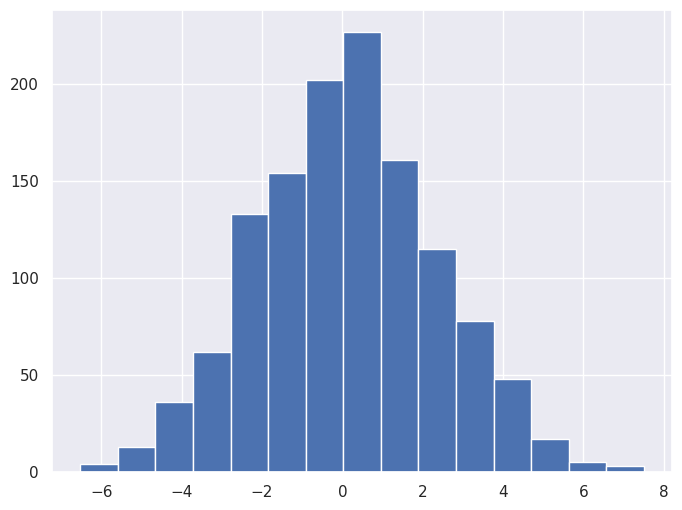

In [10]:
plt.hist(x, bins=15)

In [11]:
#the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.59          0.5520
AMZN:         11.19          0.0000


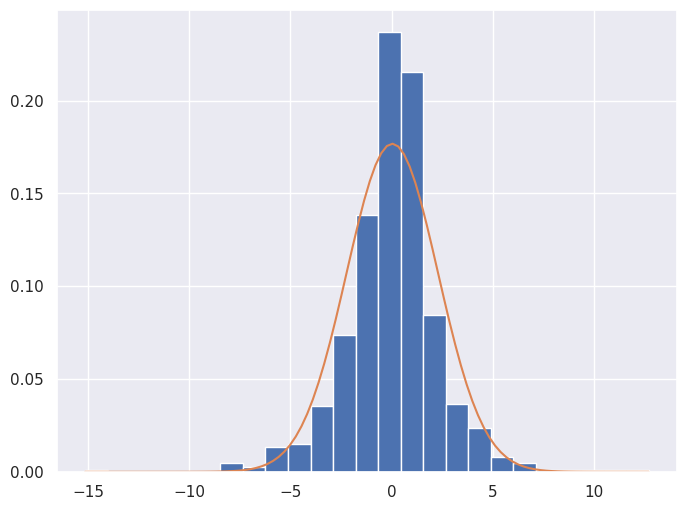

In [12]:
# plot histogram of price changes with normal curve overlay
plt.hist(amzn_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

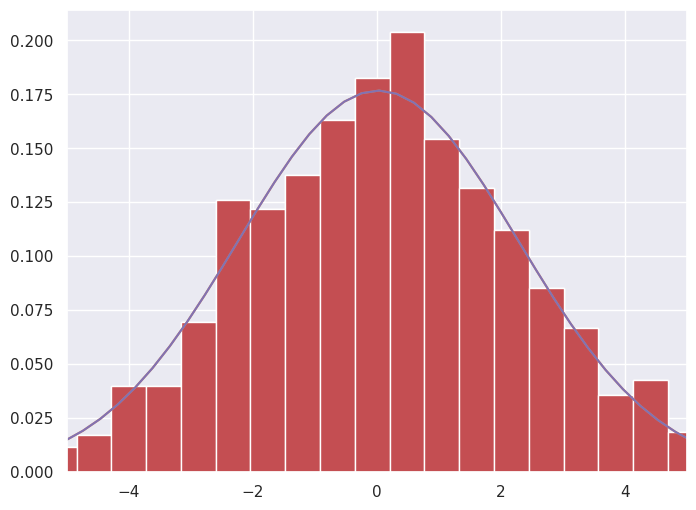

In [13]:
#Compare normally distributed sample with same attributes as amzn price change
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);
plt.hist(x, bins =25, density = True)
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

In [14]:
#stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

TtestResult(statistic=1.071111415812654, pvalue=0.285148180883715, df=251)

In [15]:
#Create price lags
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2018-01-04,60.479500,60.209999,59.450500
2018-01-05,61.457001,60.479500,60.209999
2018-01-08,62.343498,61.457001,60.479500
2018-01-09,62.634998,62.343498,61.457001
2018-01-10,62.716499,62.634998,62.343498


In [16]:
#Fit LM
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [17]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [18]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2018-01-04,60.479500,60.209999,59.450500,60.186295
2018-01-05,61.457001,60.479500,60.209999,60.465408
2018-01-08,62.343498,61.457001,60.479500,61.428822
2018-01-09,62.634998,62.343498,61.457001,62.316983
2018-01-10,62.716499,62.634998,62.343498,62.620160


<Axes: xlabel='Date'>

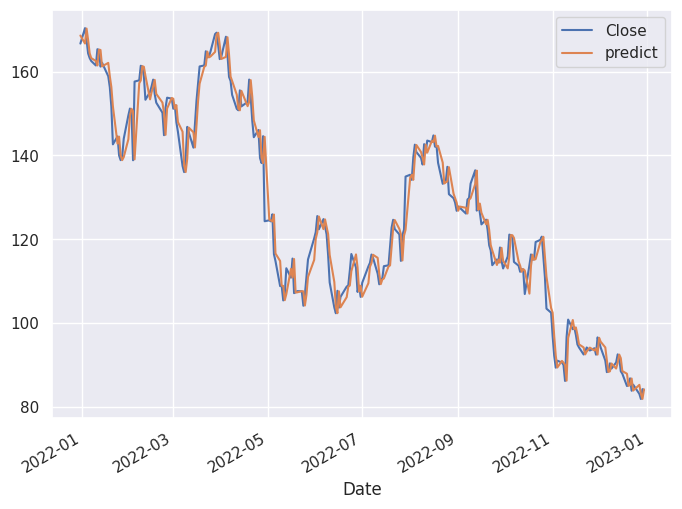

In [19]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()